# Lab04: Timeseries Data
![Time Series](https://uploads-ssl.webflow.com/5ec4696a9b6d337d51632638/6033e511c460742564ad33f7_63C156C6-39FD-4AB8-A947-0CA2F2B58180-p-800.png)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Time Series Data Structures
Pandas offers additional data structure for working with date and time. A single point in time is represented as a ``Timestamp``.

In [2]:
pd.to_datetime('2019-12-03 1:35pm')

Timestamp('2019-12-03 13:35:00')

In [3]:
pd.to_datetime('7/8/1952')

Timestamp('1952-07-08 00:00:00')

The above date is interpreted as ``month/day/year``. The order can be changed by setting the ``dayfirst`` parameter.

In [4]:
pd.to_datetime('7/8/1952', dayfirst=True)

Timestamp('1952-08-07 00:00:00')

If we supply a list or array of strings as input to ``to_datetime()``, a sequence of date/time values in a ``DatetimeIndex`` object is returned. This is the core data structure that powers much of pandas time series functionality.

In [5]:
pd.to_datetime(['2018-01-05', '7/8/1952', 'Oct 10, 1995'])

DatetimeIndex(['2018-01-05', '1952-07-08', '1995-10-10'], dtype='datetime64[ns]', freq=None)

If we pass a number of strings in the same date/time format, we can explicitly specify it with the ``format`` parameter. This can significantly speed up the performance for very large datasets.

In [6]:
pd.to_datetime(['2/25/10', '8/6/17', '12/15/12'], format='%m/%d/%y')

DatetimeIndex(['2010-02-25', '2017-08-06', '2012-12-15'], dtype='datetime64[ns]', freq=None)

In [7]:
pd.to_datetime(['2/25/2010', '8/6/2017', '12/15/2012'], format='%m/%d/%Y')

DatetimeIndex(['2010-02-25', '2017-08-06', '2012-12-15'], dtype='datetime64[ns]', freq=None)

## Creating a TimeSeries DataFrame
Daily Open Power System Data from Germany inlcuding data about electricity consumption, wind power production and solar power production for 2006-2017, everything in GWh. The data is from [this tutorial](https://github.com/Open-Power-System-Data/time_series).

First, read the data into `df` and display the head. The data can be found [here](https://raw.githubusercontent.com/ADSLab-Salzburg/DataAnalysiswithPython/main/data/opsd_germany_daily.csv).

In [8]:
# YOUR CODE HERE
# raise NotImplementedError()
df = pd.read_csv('data/opsd_germany_daily.csv')
df.head()

,Date,Consumption,Wind,Solar,Wind+Solar
0,2006-01-01,1069.184,NaN,NaN,NaN
1,2006-01-02,1380.521,NaN,NaN,NaN
2,2006-01-03,1442.533,NaN,NaN,NaN
3,2006-01-04,1457.217,NaN,NaN,NaN
4,2006-01-05,1477.131,NaN,NaN,NaN


In [9]:
# Ignore this cell - this is for automatic testing.

Describe the data frame.

In [10]:
# YOUR CODE HERE
# raise NotImplementedError()
df.describe()

,Consumption,Wind,Solar,Wind+Solar
count,4383.000000,2920.000000,2188.000000,2187.000000
mean,1338.675836,164.814173,89.258695,272.663481
std,165.775710,143.692732,58.550099,146.319884
min,842.395000,5.757000,1.968000,21.478000
25%,1217.859000,62.353250,35.179250,172.185500
50%,1367.123000,119.098000,86.407000,240.991000
75%,1457.761000,217.900250,135.071500,338.988000
max,1709.568000,826.278000,241.580000,851.556000


Show the datatypes that are used in each column. Which datatype is not very easy useable for our usecase?

In [11]:
# YOUR CODE HERE
# raise NotImplementedError()
df.dtypes

Date            object
Consumption    float64
Wind           float64
Solar          float64
Wind+Solar     float64
dtype: object

As you can see, the Date is of type _object_. But we want to use it as a _dateime64_ object. To convert it, have a look to the [pandas.to_datetime](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.to_datetime.html) function. Print the retulting datatypes.

In [12]:
# YOUR CODE HERE
# raise NotImplementedError()
df['Date'] = pd.to_datetime(df['Date'])
df.dtypes

Date           datetime64[ns]
Consumption           float64
Wind                  float64
Solar                 float64
Wind+Solar            float64
dtype: object

In [13]:
# Ignore this cell - this is for automatic testing.

In the following, one of the dates (`one_day`) is taken. You can easily extract all attributes, like year, day, month, hour, etc. from this object. In our case, the time is not set, thus it is set to 00:00:00. Play around a bit.

In [14]:
one_day = df.iloc[0, 0]
print(one_day)
print(one_day.year)
print(one_day.month)
print(one_day.day)

2006-01-01 00:00:00
2006
1
1


### Use Date  as Index
Instead of using arbritary integer values as the index, try it with the date. The date is unique anyways. Print the head.

In [15]:
# YOUR CODE HERE
# raise NotImplementedError()
df.set_index(keys='Date',inplace=True)
df.head



<bound method NDFrame.head of             Consumption     Wind   Solar  Wind+Solar
Date                                                
2006-01-01   1069.18400      NaN     NaN         NaN
2006-01-02   1380.52100      NaN     NaN         NaN
2006-01-03   1442.53300      NaN     NaN         NaN
2006-01-04   1457.21700      NaN     NaN         NaN
2006-01-05   1477.13100      NaN     NaN         NaN
...                 ...      ...     ...         ...
2017-12-27   1263.94091  394.507  16.530     411.037
2017-12-28   1299.86398  506.424  14.162     520.586
2017-12-29   1295.08753  584.277  29.854     614.131
2017-12-30   1215.44897  721.247   7.467     728.714
2017-12-31   1107.11488  721.176  19.980     741.156

[4383 rows x 4 columns]>

In [16]:
# Ignore this cell - this is for automatic testing.

### Adding New Columns
Add new columns named _Year_, _Month_ (Name, Jan-Dec), and _Weekday_ (Mo-So) and fill it with the corresponding values from the index. For further functionality of the the DateTime class have a look in the [API docs](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DatetimeIndex.html).

Print the head.

In [17]:
# YOUR CODE HERE
# raise NotImplementedError()
df['Year'] = df.index.year
df['Month'] = df.index.strftime('%b')
df['Day'] = df.index.strftime('%a')
df.head()

,Consumption,Wind,Solar,Wind+Solar,Year,Month,Day
Date,,,,,,,
2006-01-01,1069.184,NaN,NaN,NaN,2006,Jan,Sun
2006-01-02,1380.521,NaN,NaN,NaN,2006,Jan,Mon
2006-01-03,1442.533,NaN,NaN,NaN,2006,Jan,Tue
2006-01-04,1457.217,NaN,NaN,NaN,2006,Jan,Wed
2006-01-05,1477.131,NaN,NaN,NaN,2006,Jan,Thu


In [18]:
# Ignore this cell - this is for automatic testing.

### Timebased Indexing
For selecting a special date, just use `loc` with the date as a string. If a whole month shall be returned, ommit the day in the string. Play around a bit.

In [19]:
df.loc['2014-12-11']

Consumption    1631.714
Wind            487.782
Solar            10.985
Wind+Solar      498.767
Year               2014
Month               Dec
Day                 Thu
Name: 2014-12-11 00:00:00, dtype: object

In [20]:
df.loc['2012-03']

,Consumption,Wind,Solar,Wind+Solar,Year,Month,Day
Date,,,,,,,
2012-03-01,1411.553,62.293,40.042,102.335,2012,Mar,Thu
2012-03-02,1402.006,39.972,38.665,78.637,2012,Mar,Fri
2012-03-03,1186.275,107.629,55.380,163.009,2012,Mar,Sat
2012-03-04,1072.078,80.685,32.054,112.739,2012,Mar,Sun
2012-03-05,1388.816,154.206,32.907,187.113,2012,Mar,Mon
2012-03-06,1433.166,61.690,83.002,144.692,2012,Mar,Tue
2012-03-07,1455.451,157.059,75.157,232.216,2012,Mar,Wed
2012-03-08,1412.181,150.182,44.725,194.907,2012,Mar,Thu
2012-03-09,1399.515,126.102,92.597,218.699,2012,Mar,Fri


## Let's plot something!
In the following you can use the pandas plot functionality, and refine the plots using matplotlib (makes it easier).

First, plot the `Consumptions`. Use a `figsize=(11,5)` and a `linewidth=.5`. Use axis labeling and a title.

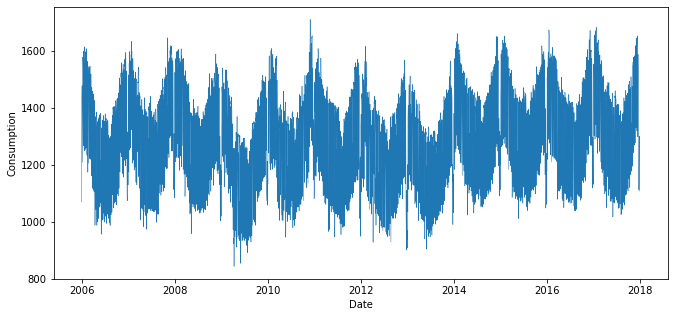

In [21]:
# YOUR CODE HERE
# raise NotImplementedError()
plt.figure(figsize=(11,5))
ax = sns.lineplot(data=df,y='Consumption',x=df.index, lw=.5)


Hmm.. Here we do not see too much. Let's try a different styling. can we see a pattern (difference between weekdays and weekends)?

Plot the same as before, but with a different `marker` and `linestyle=None`. See [the docs](https://matplotlib.org/3.3.3/api/_as_gen/matplotlib.pyplot.plot.html).

<AxesSubplot:xlabel='Date', ylabel='Consumption'>

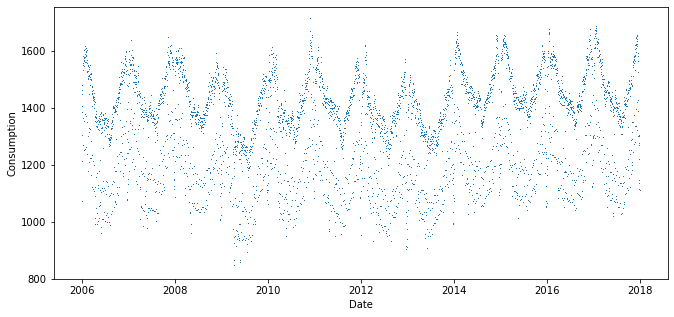

In [22]:
# YOUR CODE HERE
# raise NotImplementedError()
plt.figure(figsize=(11,5))
sns.lineplot(data=df, x=df.index, y='Consumption', marker=',', linestyle='None')

Now, you want to add two additional subplots for `Solar` and `Wind`. Again, use pandas to plot the data (same parameter as before). Adjust the `figsize` that one can see the data. For subplots with pandas, have a look [in the docs](https://pandas.pydata.org/pandas-docs/version/0.23.4/generated/pandas.DataFrame.plot.html).

Don't forget about axis labeling!

<AxesSubplot:xlabel='Date', ylabel='Consumption'>

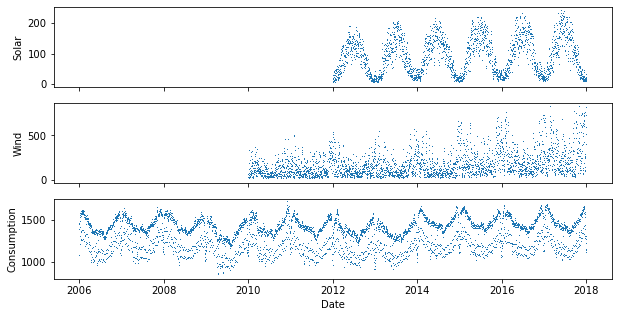

In [57]:
# YOUR CODE HERE
# raise NotImplementedError()
fig , axs = plt.subplots(3,1, figsize=(10,5), sharex=True)

sns.lineplot(data=df, x=df.index, y='Solar', marker=',', linestyle='None', ax=axs[0] )
sns.lineplot(data=df, x=df.index, y='Wind', marker=',', linestyle='None' ,ax=axs[1])
sns.lineplot(data=df, x=df.index, y='Consumption', marker=',', linestyle='None' ,ax=axs[2])


## Investigating Patterns
... by looking at slices of the data or grouping information ...

Plot the `Consumption` for one dedicated year.

<AxesSubplot:xlabel='Date', ylabel='Consumption'>

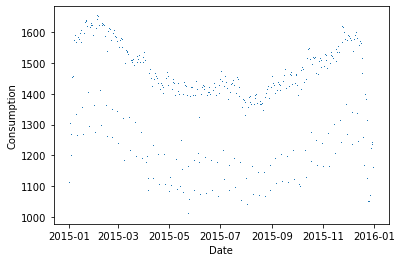

In [60]:
# YOUR CODE HERE
# raise NotImplementedError()
df2015 = df.loc['2015']
sns.lineplot(data=df2015, x=df2015.index, y='Consumption', marker=',', linestyle='None')

Let's try to group the data (e.g. monthly). You know an appropriate visualization for that!

<AxesSubplot:xlabel='Date', ylabel='Consumption'>

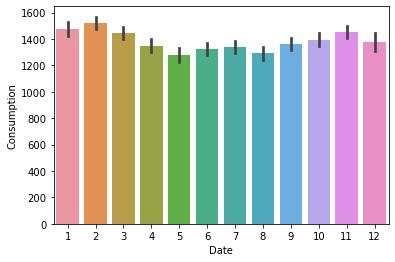

In [65]:
# YOUR CODE HERE
# raise NotImplementedError()
# sns.barplot(data=df2015.groupby('Month').sum(),x='Month', y='Consumption')
sns.barplot(data=df2015, x=df2015.index.month, y='Consumption',  linestyle='None')

## Comparing Consumption and Production
### Resampling the Data
For further analyisis, a daily view is maybe not optimal. Let's resample our data to a monthly view (sum of data in a month).

Create a new data frame with the columns `'Consumption', 'Wind', 'Solar', 'Wind+Solar'`. 
Use [resample](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.resample.html) on that data to resample it on a monthly view and use [sum](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.core.resample.Resampler.sum.html?highlight=sum#pandas.core.resample.Resampler.sum) on that resampled data to compute the monthly grouped sum.

Print the tail.

In [68]:
# YOUR CODE HERE
# raise NotImplementedError()
dfMonth = df.resample('M').sum()
dfMonth.tail()

,Consumption,Wind,Solar,Wind+Solar,Year
Date,,,,,
2017-08-31,40029.77368,5499.798,4602.808,10102.606,62527
2017-09-30,40078.56092,6287.730,3079.291,9367.021,60510
2017-10-31,42355.21893,12480.097,2130.557,14610.654,62527
2017-11-30,44339.72455,10259.001,831.044,11090.045,60510
2017-12-31,44511.10431,14725.436,494.171,15219.607,62527


Plot `'Consumption', 'Wind', 'Solar'` in one plot. Use different colors and different styles. Use a legend and don't forget about axis labeling.

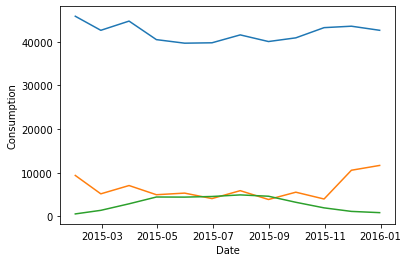

In [85]:
# YOUR CODE HERE
# raise NotImplementedError()
plt.figure()
sns.lineplot(data=dfMonth.loc['2015'], x=dfMonth.loc['2015'].index,y='Consumption')
sns.lineplot(data=dfMonth.loc['2015'], x=dfMonth.loc['2015'].index,y='Wind')
sns.lineplot(data=dfMonth.loc['2015'], x=dfMonth.loc['2015'].index,y='Solar')
plt.show()


## Use Your Own Data
Go to [Wiki Pageviews](https://tools.wmflabs.org/pageviews/) and download a dataset of the pageviews of a Wikipedia page of your choice. 
- Enter the page name(s).
- Click into the Dates field and choose "All time".
- Download the .csv file.

Next, load the data into a pandas ``DataFrame``:
- Change the index to a ``DateTimeIndex``.
- Inspect the dataset (missing values?)
- Add additional columns (Weekday, Month)
- Try to find patterns:
  - selecting just one year/month
  - grouping monthly/weekly

Finally, for the submission, show at least one plot with a weekly aggregate of numbers.

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

### Inspiration/Further Reading
- [Time Series Analysis with Pandas (Tutorial)](https://www.dataquest.io/blog/tutorial-time-series-analysis-with-pandas/)
- [Working with Time Series in Python (Tutorial)](https://jakevdp.github.io/PythonDataScienceHandbook/03.11-working-with-time-series.html)